# Load Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
email_df = pd.read_csv("../archive/spam_ham_data/emails.csv")

In [3]:
email_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


# EDA

In [4]:
email_df.isna().sum()

text    0
spam    0
dtype: int64

In [5]:
email_df.duplicated().sum()

np.int64(33)

In [6]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
import matplotlib.pyplot as plt

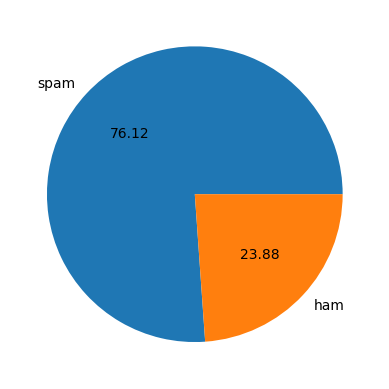

In [15]:
plt.pie(email_df["spam"].value_counts(), labels=["spam", "ham"], autopct="%0.2f")
plt.show()

In [16]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [17]:
def word_stats(text):
    doc = nlp(text)
    return {
        "num_words": sum(1 for token in doc if token.is_alpha),
        "num_chars": len(text),
        "num_senc": len(list(doc.sents)),
    }

In [18]:
email_df = email_df.join(
    email_df["text"].apply(word_stats).apply(pd.Series)
)
# took over 4 mins so saved in the below path.
email_df.to_csv("../archive/spam_ham_data/emails_with_word_stats.csv")

In [19]:
# Spam Stats
email_df[email_df["spam"] == 1][['num_chars','num_words','num_senc']].describe()


,num_chars,num_words,num_senc
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,196.108918,17.961257
std,2271.372893,348.446386,24.166863
min,18.000000,2.000000,1.000000
25%,401.500000,61.000000,6.000000
50%,693.500000,93.500000,10.000000
75%,1250.250000,187.000000,24.000000
max,28432.000000,4737.000000,376.000000


In [20]:
# Non - Spam Stats
email_df[email_df["spam"] == 0][['num_chars','num_words','num_senc']].describe()


,num_chars,num_words,num_senc
count,4360.000000,4360.000000,4360.000000
mean,1631.918119,237.859633,18.353211
std,1959.664549,287.733218,21.787099
min,13.000000,2.000000,1.000000
25%,577.750000,86.000000,7.000000
50%,1122.000000,165.000000,12.000000
75%,2037.250000,298.000000,22.000000
max,43952.000000,6994.000000,595.000000


In [21]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

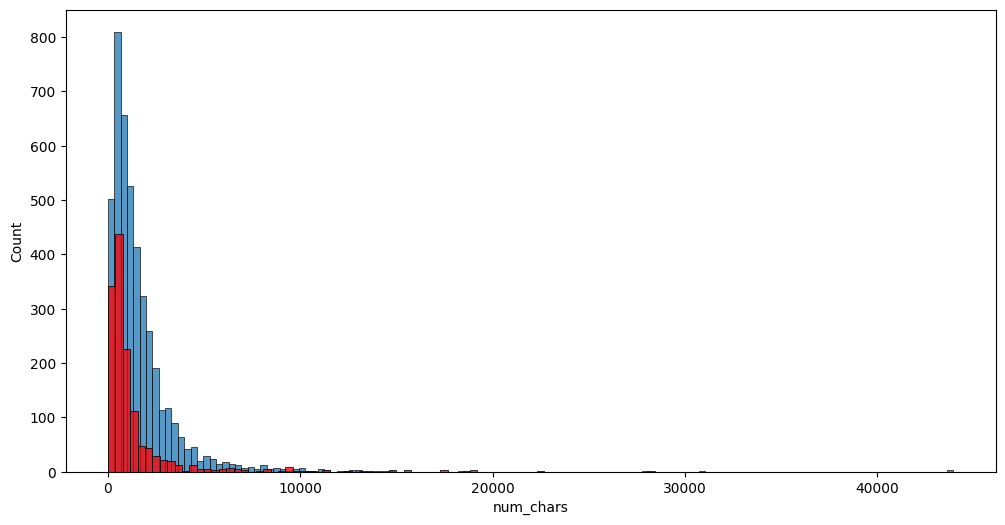

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(email_df[email_df["spam"] == 0]["num_chars"])
sns.histplot(email_df[email_df["spam"] == 1]["num_chars"], color="red")

# Data Preprocessing

Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [24]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [25]:
def transform_text_spacy_lemma(text):
    doc = nlp(text)

    tokens = [
        token.lemma_.lower()
        for token in doc
        if token.is_alpha and not token.is_stop
    ]

    return " ".join(tokens)

In [42]:
email_df["transformed_text"] = email_df["text"].apply(transform_text_spacy_lemma)

In [26]:
# email_df.to_csv("../archive/spam_ham_data/emails_with_transformed_text.csv")
email_df = pd.read_csv("../archive/spam_ham_data/emails_with_transformed_text.csv")
email_df.head()

,Unnamed: 0,text,spam,num_words,num_chars,num_senc,transformed_text
0,0,Subject: naturally irresistible your corporate...,1,188,1484,34,subject naturally irresistible corporate ident...
1,1,Subject: the stock trading gunslinger fanny i...,1,89,598,4,subject stock trading gunslinger fanny merrill...
2,2,Subject: unbelievable new homes made easy im ...,1,76,448,3,subject unbelievable new home easy m want home...
3,3,Subject: 4 color printing special request add...,1,65,500,5,subject color print special request additional...
4,4,"Subject: do not have money , get software cds ...",1,40,235,4,subject money software cd software compatibili...


# Model Building

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [28]:
cv = CountVectorizer()

In [29]:
x = cv.fit_transform(email_df["transformed_text"]).toarray()

In [30]:
y = email_df["spam"].values
y

array([1, 1, 1, ..., 0, 0, 0], shape=(5728,))

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)

In [32]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [33]:
gnb.fit(xtrain, ytrain)
y_pred1 = gnb.predict(xtest)
print("GaussianNB")
print("accuracy score", accuracy_score(ytest, y_pred1))
print("confusion score", confusion_matrix(ytest, y_pred1))
print("precision score", precision_score(ytest, y_pred1))


GaussianNB
accuracy score 0.9554973821989529
confusion score [[853   9]
 [ 42 242]]
precision score 0.9641434262948207


In [34]:
mnb.fit(xtrain, ytrain)
y_pred2 = mnb.predict(xtest)
print("MultinomialNB")
print("accuracy score", accuracy_score(ytest, y_pred2))
print("confusion score", confusion_matrix(ytest, y_pred2))
print("precision score", precision_score(ytest, y_pred2))


MultinomialNB
accuracy score 0.9895287958115183
confusion score [[854   8]
 [  4 280]]
precision score 0.9722222222222222


In [35]:
bnb.fit(xtrain, ytrain)
y_pred3 = bnb.predict(xtest)
print("BernoulliNB")
print("accuracy score", accuracy_score(ytest, y_pred3))
print("confusion score", confusion_matrix(ytest, y_pred3))
print("precision score", precision_score(ytest, y_pred3))


BernoulliNB
accuracy score 0.9781849912739965
confusion score [[857   5]
 [ 20 264]]
precision score 0.9814126394052045


In [36]:
# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=4500)


In [37]:
x = tfidf.fit_transform(email_df["transformed_text"]).toarray()

In [38]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)

In [40]:
gnb.fit(xtrain, ytrain)
y_pred1 = gnb.predict(xtest)
print("GaussianNB")
print("accuracy score", accuracy_score(ytest, y_pred1))
print("confusion score", confusion_matrix(ytest, y_pred1))
print("precision score", precision_score(ytest, y_pred1))


GaussianNB
accuracy score 0.9642233856893543
confusion score [[856   6]
 [ 35 249]]
precision score 0.9764705882352941


In [41]:
mnb.fit(xtrain, ytrain)
y_pred2 = mnb.predict(xtest)
print("MultinomialNB")
print("accuracy score", accuracy_score(ytest, y_pred2))
print("confusion score", confusion_matrix(ytest, y_pred2))
print("precision score", precision_score(ytest, y_pred2))


MultinomialNB
accuracy score 0.981675392670157
confusion score [[859   3]
 [ 18 266]]
precision score 0.9888475836431226


In [42]:
mnb.fit(xtrain, ytrain)
y_pred2 = mnb.predict(xtest)
print("MultinomialNB")
print("accuracy score", accuracy_score(ytest, y_pred2))
print("confusion score", confusion_matrix(ytest, y_pred2))
print("precision score", precision_score(ytest, y_pred2))


MultinomialNB
accuracy score 0.981675392670157
confusion score [[859   3]
 [ 18 266]]
precision score 0.9888475836431226


In [50]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()


In [53]:
def find_max_feature(email_df, y, gnb, mnb):
    
    best_scores = {
        "GaussianNB": {
            "best_accuracy": 0,
            "best_accuracy_features": None,
            "best_precision": 0,
            "best_precision_features": None
        },
        "MultinomialNB": {
            "best_accuracy": 0,
            "best_accuracy_features": None,
            "best_precision": 0,
            "best_precision_features": None
        }
    }

    for i in range(200, 7001, 200):
        print(i)
        tfidf = TfidfVectorizer(max_features=i)
        X = tfidf.fit_transform(email_df["transformed_text"])
        # X = scaler.fit_transform(X)
        
        xtrain, xtest, ytrain, ytest = train_test_split(
            X, y, test_size=0.2, random_state=2
        )

        # ---------- GaussianNB ----------
        gnb.fit(xtrain.toarray(), ytrain)
        gnb_pred = gnb.predict(xtest.toarray())

        gnb_acc = accuracy_score(ytest, gnb_pred)
        gnb_prec = precision_score(ytest, gnb_pred)

        if gnb_acc > best_scores["GaussianNB"]["best_accuracy"]:
            best_scores["GaussianNB"]["best_accuracy"] = gnb_acc
            best_scores["GaussianNB"]["best_accuracy_features"] = i

        if gnb_prec > best_scores["GaussianNB"]["best_precision"]:
            best_scores["GaussianNB"]["best_precision"] = gnb_prec
            best_scores["GaussianNB"]["best_precision_features"] = i


        # ---------- MultinomialNB ----------
        mnb.fit(xtrain, ytrain)
        mnb_pred = mnb.predict(xtest)

        mnb_acc = accuracy_score(ytest, mnb_pred)
        mnb_prec = precision_score(ytest, mnb_pred)

        if mnb_acc > best_scores["MultinomialNB"]["best_accuracy"]:
            best_scores["MultinomialNB"]["best_accuracy"] = mnb_acc
            best_scores["MultinomialNB"]["best_accuracy_features"] = i

        if mnb_prec > best_scores["MultinomialNB"]["best_precision"]:
            best_scores["MultinomialNB"]["best_precision"] = mnb_prec
            best_scores["MultinomialNB"]["best_precision_features"] = i

    return best_scores


In [52]:
find_max_feature(email_df, y, gnb, mnb)

200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000


{'GaussianNB': {'best_accuracy': 0.9738219895287958,
  'best_accuracy_features': 1000,
  'best_precision': 0.984,
  'best_precision_features': 4600},
 'MultinomialNB': {'best_accuracy': 0.9930191972076788,
  'best_accuracy_features': 4200,
  'best_precision': 0.9928571428571429,
  'best_precision_features': 5400}}

In [54]:
find_max_feature(email_df, y, gnb, mnb)


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000


{'GaussianNB': {'best_accuracy': 0.9738219895287958,
  'best_accuracy_features': 1000,
  'best_precision': 0.9841897233201581,
  'best_precision_features': 5800},
 'MultinomialNB': {'best_accuracy': 0.9860383944153578,
  'best_accuracy_features': 3000,
  'best_precision': 0.9962264150943396,
  'best_precision_features': 6600}}

In [56]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [58]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [59]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [60]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [61]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9886561954624782
Precision -  0.9891696750902527
For  KN
Accuracy -  0.9781849912739965
Precision -  0.9814126394052045
For  NB
Accuracy -  0.981675392670157
Precision -  0.9888475836431226
For  DT
Accuracy -  0.9179755671902269
Precision -  0.7698863636363636
For  LR
Accuracy -  0.9712041884816754
Precision -  0.9700374531835206


/home/ssjain/Desktop/apps/machine-projects/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/ssjain/Desktop/apps/machine-projects/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


For  RF
Accuracy -  0.9834205933682374
Precision -  0.9925650557620818
For  AdaBoost
Accuracy -  0.9511343804537522
Precision -  0.867741935483871
For  BgC
Accuracy -  0.9712041884816754
Precision -  0.9466192170818505
For  ETC
Accuracy -  0.9825479930191972
Precision -  0.9962406015037594
For  GBDT
Accuracy -  0.9537521815008726
Precision -  0.9529411764705882
For  xgb
Accuracy -  0.9851657940663177
Precision -  0.9651567944250871


In [64]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values(['Precision',"Accuracy"],ascending=False)


In [65]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.982548,0.996241
5,RF,0.983421,0.992565
0,SVC,0.988656,0.989170
2,NB,0.981675,0.988848
1,KN,0.978185,0.981413
4,LR,0.971204,0.970037
10,xgb,0.985166,0.965157
9,GBDT,0.953752,0.952941
7,BgC,0.971204,0.946619
6,AdaBoost,0.951134,0.867742


In [66]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [67]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [68]:
voting.fit(X_train,y_train)


,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('svm', ...), ('nb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'sigmoid'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1.0
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0


In [69]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9930191972076788
Precision 0.9964028776978417


In [70]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [71]:
from sklearn.ensemble import StackingClassifier


In [72]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [73]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9912739965095986
Precision 0.9858156028368794
